In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


Reading the training data 

In [129]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
# Rename 'austim' to 'autism'
train.rename(columns={'austim': 'autism', 'jundice':'jaundice'}, inplace=True)
print(train.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jaundice autism  \
0         1         0          0  ...       f  White-European       no     no   
1         1         0          1  ...       m          Latino       no    yes   
2         1         1          1  ...       m          Latino      yes    yes   
3         1         0          1  ...       f  White-European       no    yes   
4         1         0          0  ...       f               ?       no     no   

   contry_of_res used_app_before result     age_desc relation 

In [130]:
train.shape


(704, 21)

In [131]:
train.info()
#print(train.empty)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jaundice         704 non-null    object 
 14  autism           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [132]:
#getting summary statistics 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


Inspecting data for any anomolies for data cleaning 
We can see in the output below that there are discrepencies such as 'other' '?' and 'Others' which probably are for some unkown value and are substituted as an indicator of that.

In [133]:
#Checking for duplicates
duplicates = train.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
#checking data types
print(train.dtypes)

#checking inconsistencies in each column of data
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'autism', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(train[col].value_counts())



Number of duplicate rows: 5
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
autism              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

Value counts for gender:
gender
m    367
f    337
Name: count, dtype: int64

Value counts for ethnicity:
ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1

Cleaning data up after checking the descrepensies 

In [134]:
train = train.replace({'yes':1, 'no':0, 'YES':1, 'NO':0, '?':'Others', 'others':'Others'})
print(train.head())

print(train.info())
print(train.describe().T)
#checking if data has been cleaned 
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(train[col].value_counts())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jaundice  \
0         1         0          0  ...       f  White-European        0   
1         1         0          1  ...       m          Latino        0   
2         1         1          1  ...       m          Latino        1   
3         1         0          1  ...       f  White-European        0   
4         1         0          0  ...       f          Others        0   

   autism  contry_of_res used_app_before  result     age_desc relation  \
0       0  United States      

C:\Users\syedh\AppData\Local\Temp\ipykernel_21408\2695264926.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace({'yes':1, 'no':0, 'YES':1, 'NO':0, '?':'Others', 'others':'Others'})


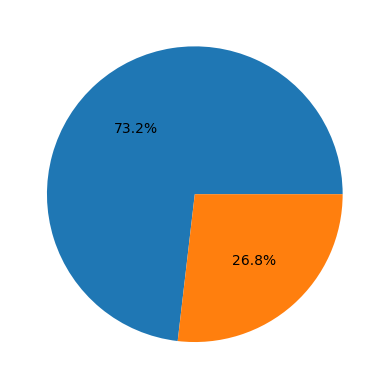

In [135]:

#visualising to check for any outliers
#numerical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

#for col in numerical_columns:
 #   plt.figure(figsize=(8, 4))
  #  sns.boxplot(x=train[col])
   # plt.title(f'Boxplot of {col}')
    #plt.show()



plt.pie(train['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


Separating columns into ints, objects, and floats for more efficient and targeted analysis

In [136]:
ints = []
objects = []
floats = []
for col in train.columns:
    if train[col].dtype == int:
        ints.append(col)
    elif train[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

 The Class/ASD column is removed because it is the target variable that has already been analyzed visually with the pie chart and it is also the label we are trying to predict so we do not want to include it in out feature set.

In [137]:

ints.remove('Class/ASD')